# PCA

In [1]:
import numpy as np

#https://www.askpython.com/python/examples/principal-component-analysis

## Subtract the mean of each variable

In [4]:
#Generate a dummy dataset.
X = np.random.randint(10,50,100) \
.reshape(20,5) #20 observations for 5 variables

# mean Centering the data  
X_meaned = X - np.mean(X , axis = 0)

## Calculate the Covariance Matrix

In [5]:
#covariance matrix is a square matrix denoting the covariance of the elements with each other. The covariance of an element with itself is nothing but just its Variance.

# calculating the covariance matrix of the mean-centered data.
# rowvar = False to get the covariance matrix in the required dimensions
cov_mat = np.cov(X_meaned , rowvar = False)

## Compute the Eigenvalues and Eigenvectors

In [6]:
#The Eigenvectors of the Covariance matrix we get are Orthogonal to each other and each vector represents a principal axis.

#A Higher Eigenvalue corresponds to a higher variability. Hence the principal axis with the higher Eigenvalue will be an axis capturing higher variability in the data.

#Orthogonal means the vectors are mutually perpendicular to each other. Eigenvalues and vectors seem to be very scary until we get the idea and concepts behind it.

#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

## Sort Eigenvalues in descending order

In [7]:
#each column in the Eigen vector-matrix corresponds to a principal component, so arranging them in descending order of their Eigenvalue will automatically arrange the principal component in descending order of their variability.

#Hence the first column in our rearranged Eigen vector-matrix will be a principal component that captures the highest variability.

#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]

#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]

## Select a subset from the rearranged Eigenvalue matrix

In [8]:
#Select a subset from the rearranged Eigenvalue matrix as per our need i.e. number_comp = 2. This means we selected the first two principal components.

# select the first n eigenvectors, n is desired dimension
# of our final reduced data.
 
n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

## Transform the data

In [9]:
#Finally, transform the data by having a dot product between the Transpose of the Eigenvector subset and the Transpose of the mean-centered data. 
# By transposing the outcome of the dot product, the result we get is the data reduced to lower dimensions from higher dimensions.

#Transform the data 
X_reduced = np.dot(
    eigenvector_subset.transpose(), X_meaned.transpose()
    ).transpose()

In [ ]:
#The final dimensions of X_reduced will be ( 20, 2 ) and originally the data was of higher dimensions ( 20, 5 ).

## Complete Code for Principal Component Analysis in Python

In [2]:
def PCA(X , num_components):
     
    #Step-1 Subtract the mean of each variable
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2 Calculate the Covariance Matrix
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3 Compute the Eigenvalues and Eigenvectors
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4 Sort Eigenvalues in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5 Select a subset from the rearranged Eigenvalue matrix
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6 Transform the data
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

## PCA on Iris Data

In [6]:
import pandas as pd
from sklearn.datasets import load_iris

Iris_Dataset = load_iris()
labels = load_iris().target_names

In [11]:
Iris_Dataset.describe()

AttributeError: describe

In [13]:
Iris_Dataset = load_iris()
labels = load_iris().target_names

data = pd.DataFrame(load_iris().data, columns=['Sepel_Length','Sepel_Width','Petal_Length','Petal_Width'])
data.head()

,Sepel_Length,Sepel_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
target_col = pd.DataFrame(load_iris().target, columns=['Species'])
target_col.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [15]:
#Applying it to PCA function
mat_reduced = PCA(data , 2)

#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])

#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , target_col] , axis = 1)

#principal_df = pd.concat([principal_df , pd.DataFrame(target_col)] , axis = 1)

## Plot

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

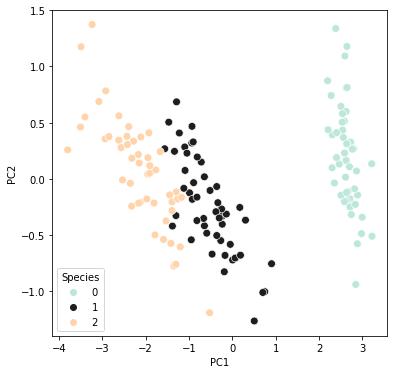

In [18]:
import seaborn as sb
import matplotlib.pyplot as plt
 
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'Species' , s = 60 , palette= 'icefire')